In [28]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import scipy as sp
import cv2
import sys
import seaborn as sns

from skimage.data import shepp_logan_phantom
from skimage.transform import (radon, rescale, iradon)
from skimage.restoration import (denoise_bilateral, calibrate_denoiser, denoise_nl_means,
                                 denoise_tv_bregman, denoise_tv_chambolle, denoise_wavelet, estimate_sigma)
from skimage.util import (img_as_float, random_noise)
from skimage.color import rgb2gray
from skimage.metrics import peak_signal_noise_ratio as peakSNR
from skimage.io import use_plugin, imread, imsave, find_available_plugins, imshow

from utils import * 

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
reconstructor = CTReconstructor()

In [39]:
projection_path = r'.\data_5um\5um_data.hdf'
id_slice = 900

sinogram, angles, cor = reconstructor.generate_sinogram_hdf(projection_path, id_slice=id_slice, save=True, plot=False)

depth = 1800
height = 2688
width = 4032


c:\Users\bherr\AppData\Local\Programs\Python\Python310\lib\site-packages\algotom\prep\calculation.py:203: UserWarning: Global minimum is out of the searching range. Please reduce the starting value !!!
  warnings.warn(msg)


Center of rotation vo: 1743.0
Center of rotation vo: 1694.788818359375


In [44]:
4032//2

2016

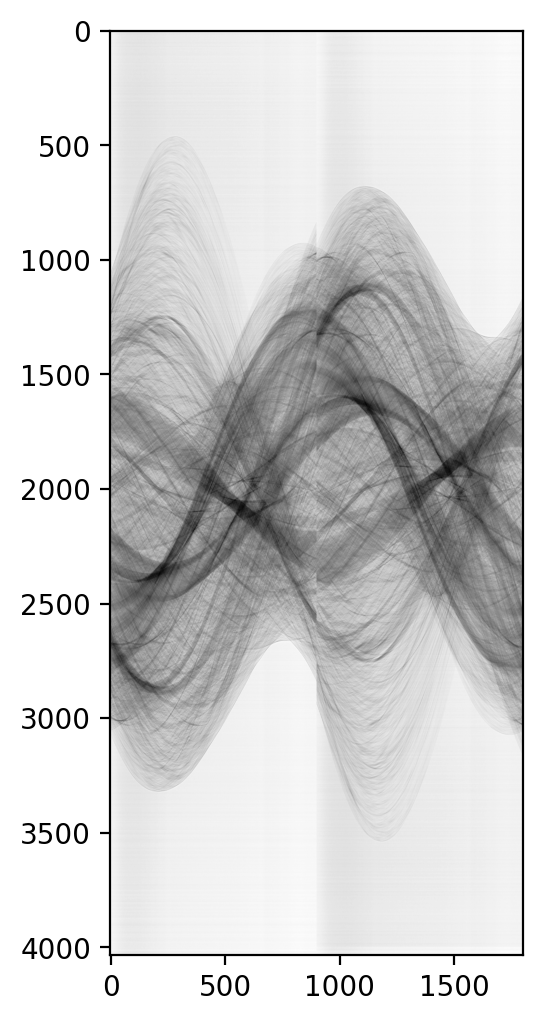

In [68]:
# cor = 1980

for i in range(1980,1981,1):
    # angles_curr = np.linspace(0.0, 180.0, 900)
    rec_img = reconstructor.reconstruct_slice_from_sinogram(sinogram[:900,:], angles[:900], i)
    # rec_img = reconstructor.reconstruct_slice_from_sinogram(sinogram[:900,:], angles_curr, 1980)

    # fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(8,6), dpi=200)
    # ax1.imshow(rec_img[900:3500 , 1000:3300], cmap=plt.cm.Greys_r)
    # ax2.imshow(rec_img[1350:2150, 1600:2400], cmap=plt.cm.Greys_r)
    # ax2.set_title(str(i))
    # ax3.imshow(np.vstack((sinogram[:900,:], np.roll(sinogram[:900,::-1], 4032//2 - i))), cmap=plt.cm.Greys_r)
    # plt.show()

    fig, ax = plt.subplots( figsize=(8,6), dpi=200)
    ax.imshow(np.vstack((sinogram[:900,:], np.roll(sinogram[:900,::-1], i - 4032//2))).T, cmap=plt.cm.Greys_r, aspect='auto')
    plt.show()

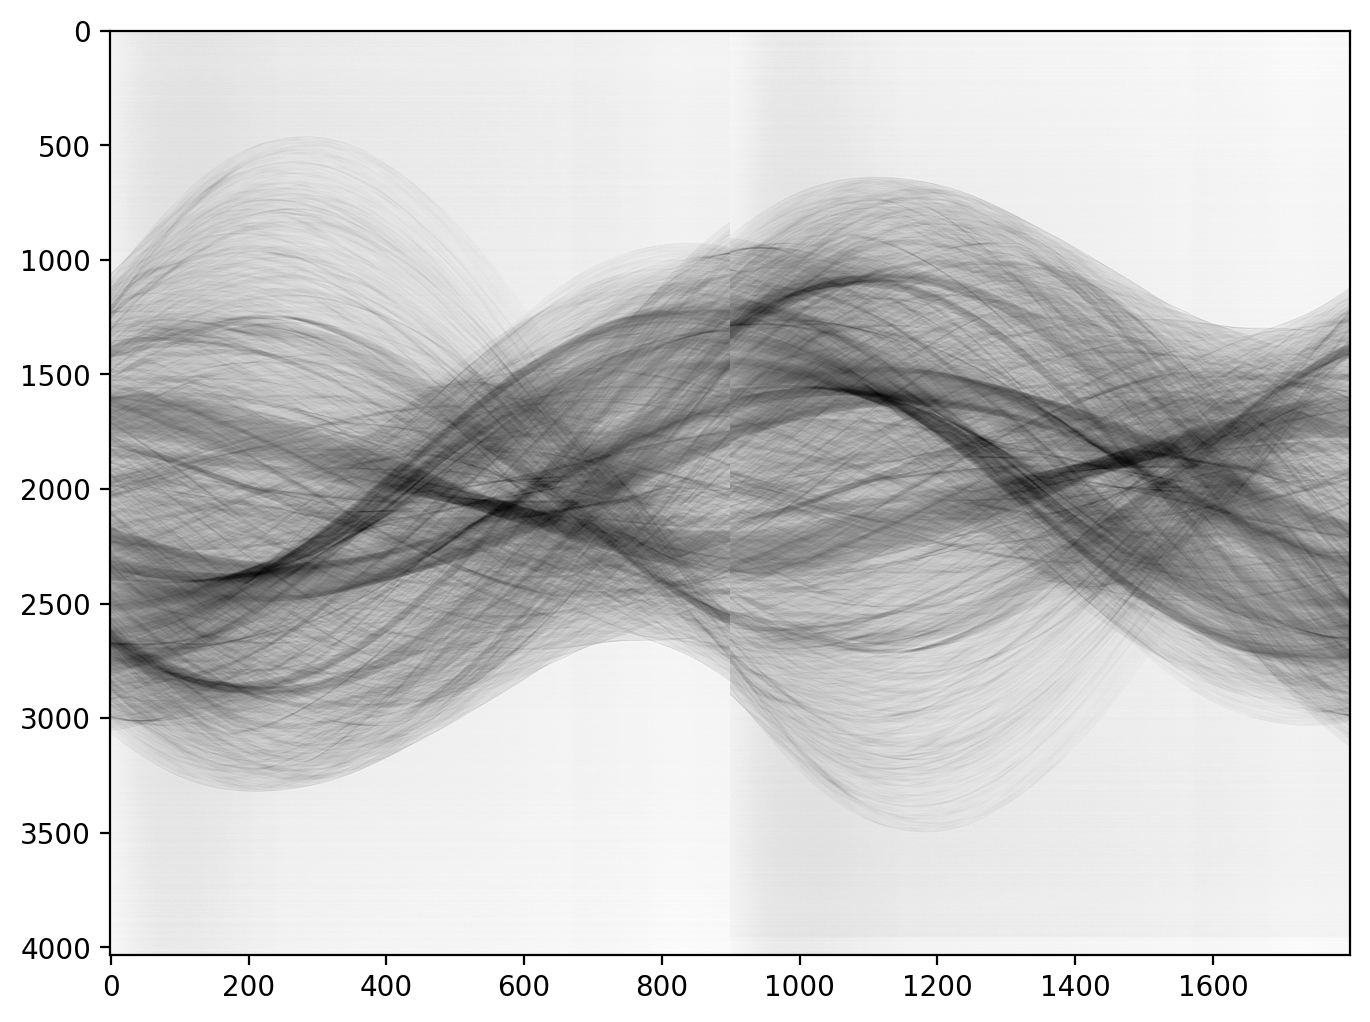

In [92]:
fig, ax = plt.subplots( figsize=(8,6), dpi=200)

i = 900

ax.imshow(np.vstack((sinogram[:i,:], np.roll(sinogram[:i,::-1], 1940 - 4032//2))).T, cmap=plt.cm.Greys_r, aspect='auto') #[:,600:1200]
plt.show()

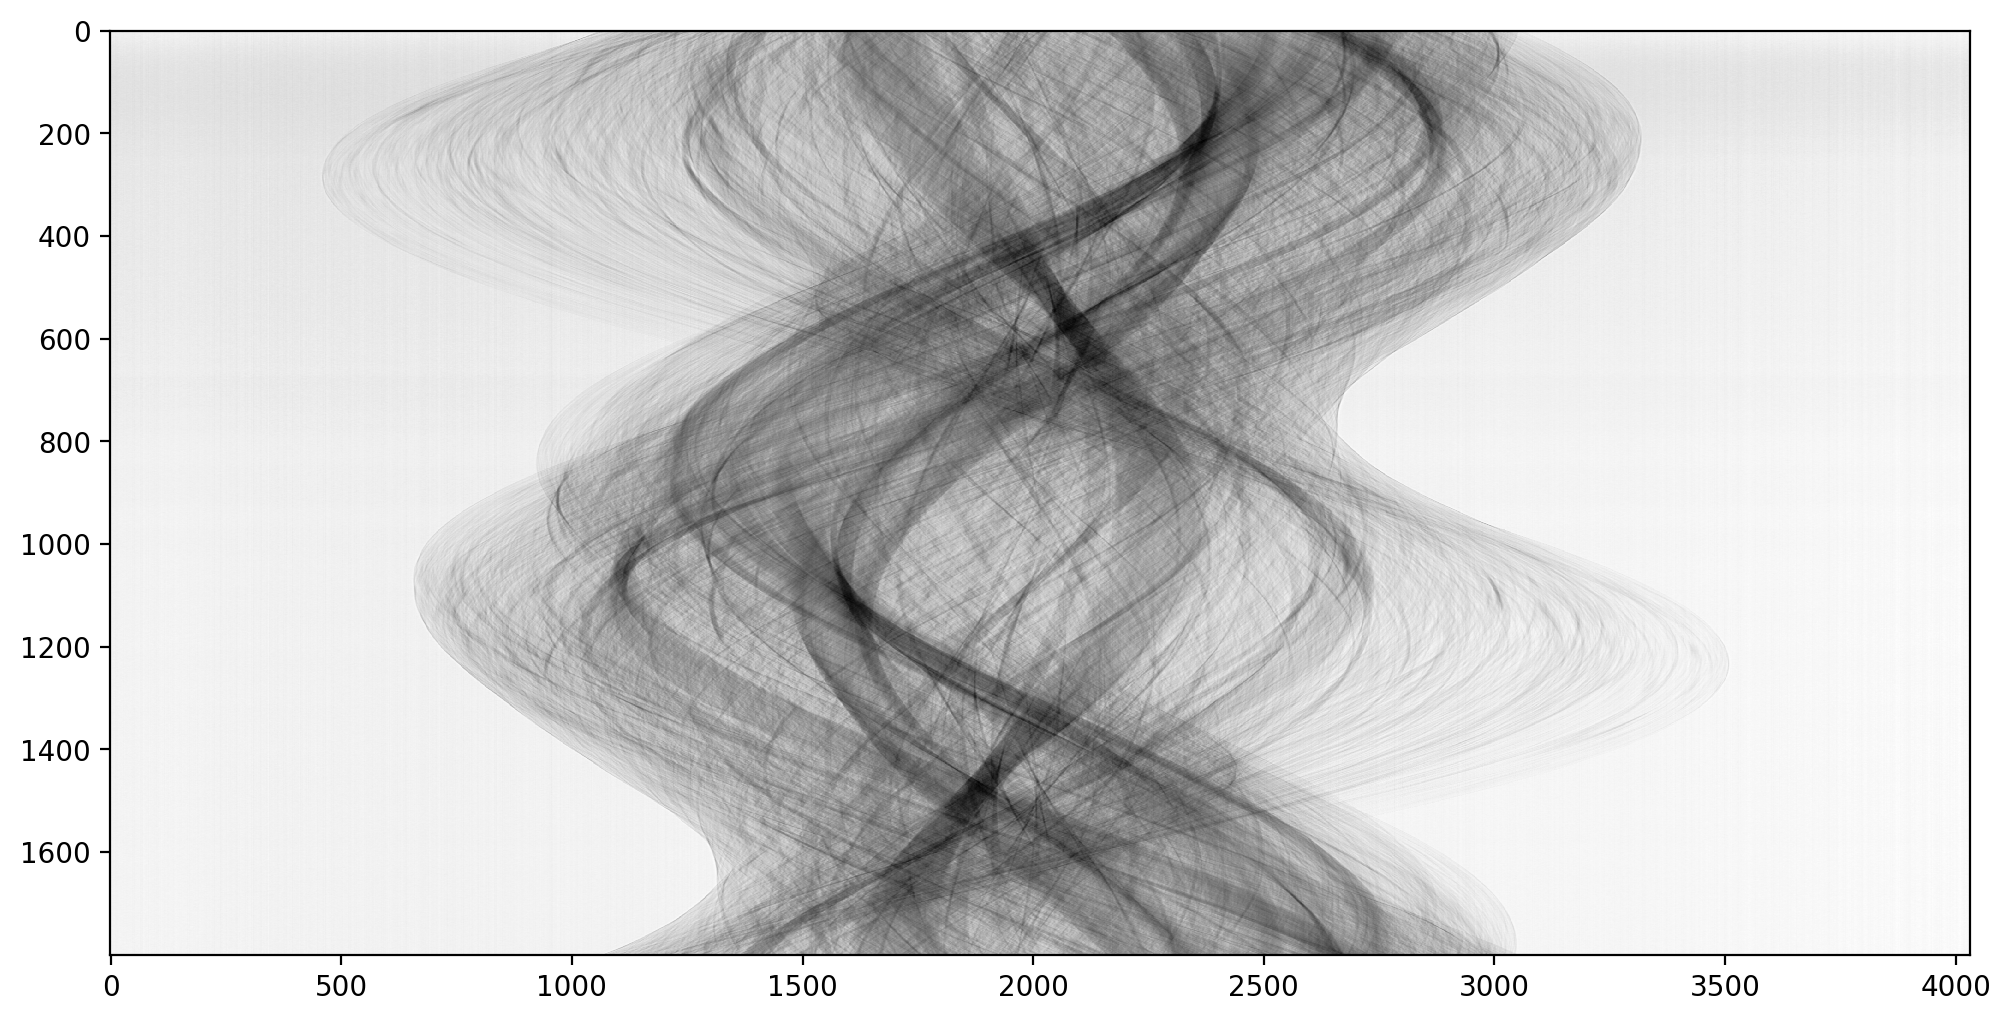

In [17]:
# Discontinuous sinograms, center of rotation
fig, ax = plt.subplots(figsize=(12,6), dpi=200)
ax.imshow(sinogram, cmap=plt.cm.Greys_r, interpolation='nearest', aspect='auto')
plt.show()

In [18]:
import algotom.rec.reconstruction as rec

output_base = "./manual_finding/using_slices/"
rec.find_center_visual_slices(sinogram, output_base, 1500,
                               2500, 250, zoom=1.0, method="fbp", gpu=False)

'./manual_finding/using_slices//Find_center_003/'

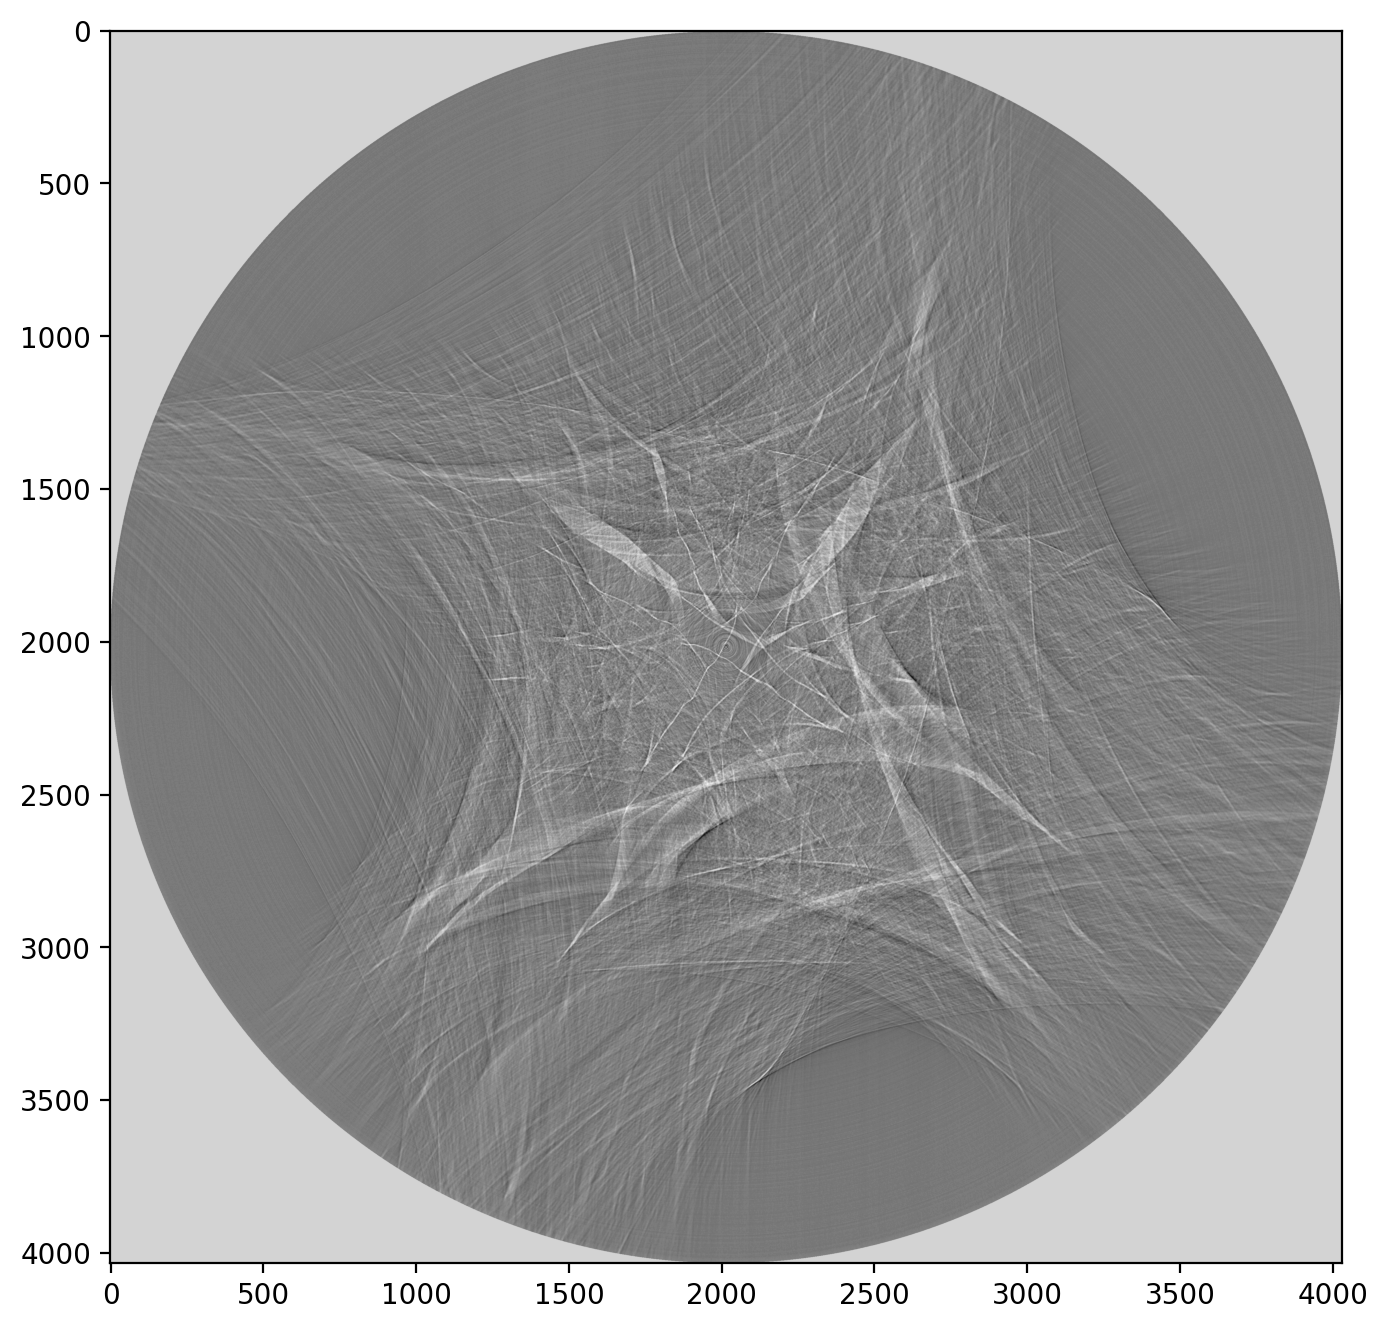

In [24]:
rec = cv2.imread("./manual_finding/using_slices/Find_center_003/center_2000.00.tif", cv2.IMREAD_UNCHANGED)
fig, ax = plt.subplots(figsize=(8,8), dpi=200)
ax.imshow(rec, cmap=plt.cm.Greys_r)
plt.show()

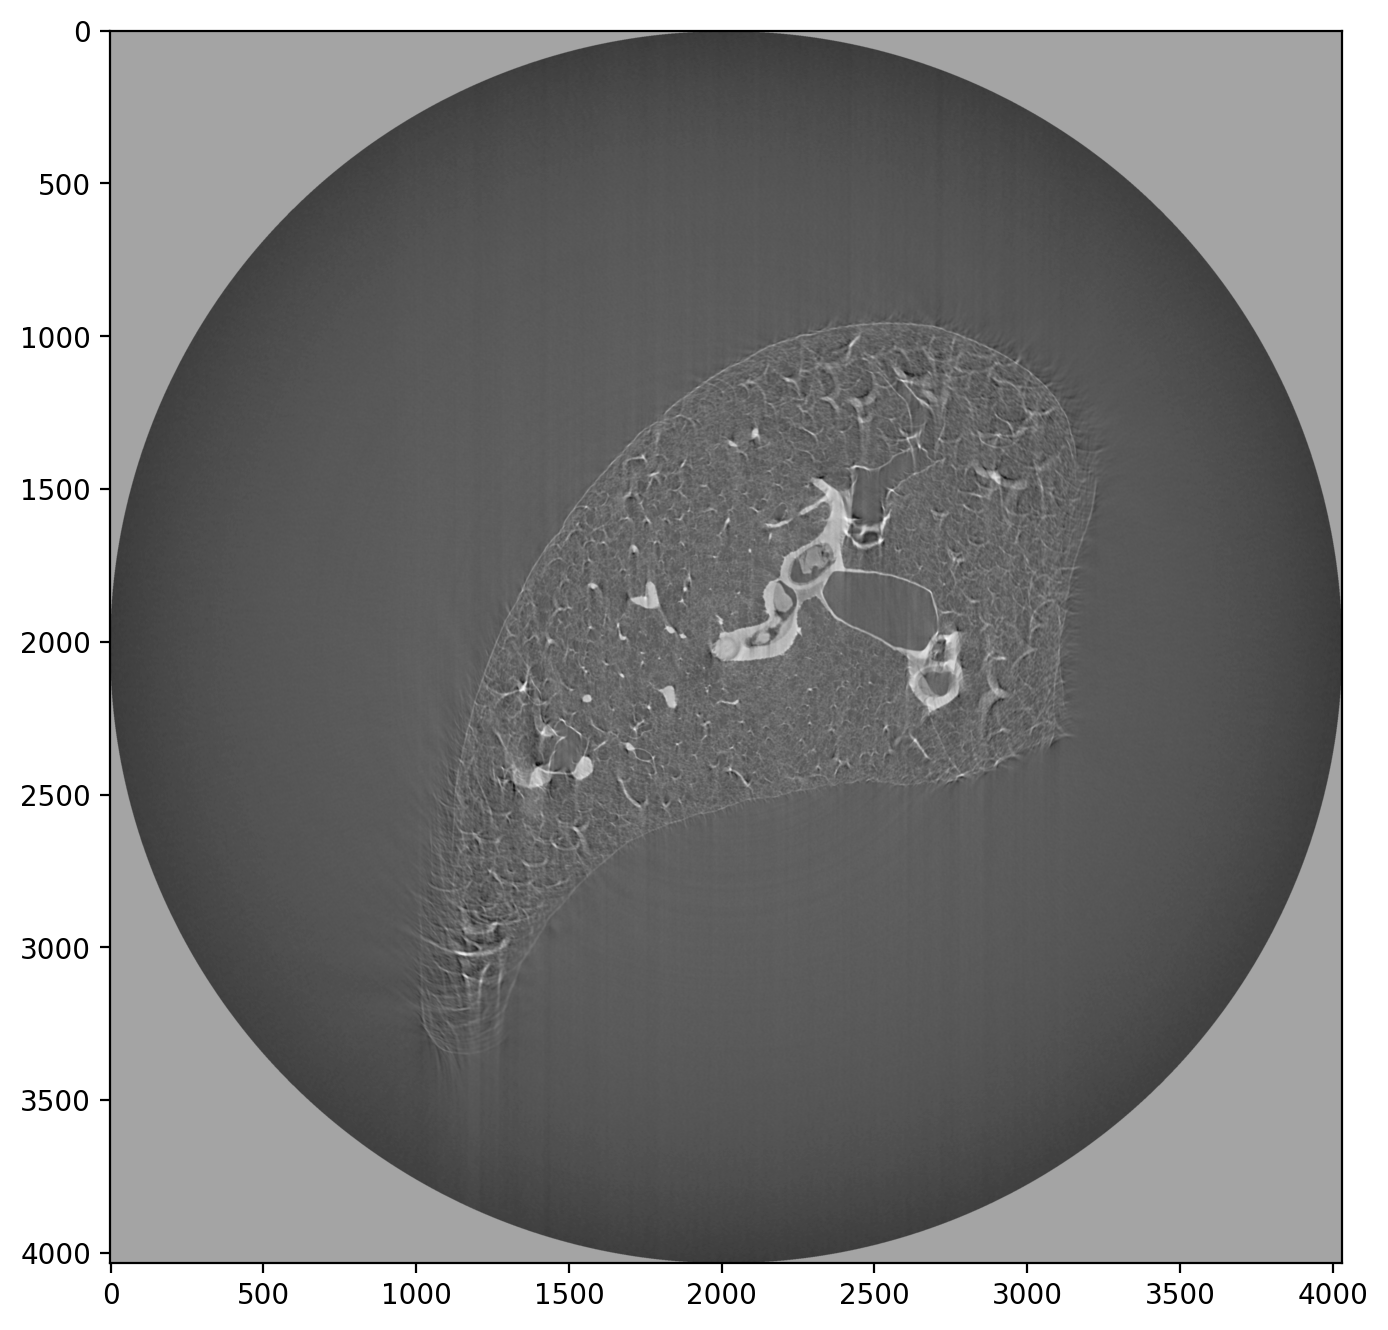

In [41]:
fig, ax = plt.subplots(figsize=(8,8), dpi=200)
ax.imshow(rec_img, cmap=plt.cm.Greys_r)
plt.show()